In [1]:
from funcoes import *
import geopandas as gpd

%load_ext autoreload
%autoreload 2

In [2]:
anos = range(1985, 2025)
anos_numericos = np.array(anos)  
gdf = gpd.read_file("../input_data/bh_lago_paranoa_31983.geojson")
gdf['uh_label'] = gdf['uh_label'].apply(lambda row: row.split("  ")[-1])
gdf = gdf.sort_values("uh_label")
zonas = gdf['uh_label'].tolist()
print(f"Zonas encontradas: {gdf['uh_label'].tolist()}")  # Assumindo que há uma coluna 'nome'

Zonas encontradas: ['Córrego Bananal', 'Lago Paranoá', 'Riacho Fundo', 'Ribeirão do Gama', 'Ribeirão do Torto']


In [3]:
suffix_name = './intermediate_outputs/aet'
variavel = "Evapotranspiração real"

## PARA A BACIA HIDROGRÁFICA TODA

In [4]:
medias, media_geral, stats = calculo_media_bh(anos, suffix_name, gdf)
print(medias.max(), medias.min())


Resultados para ./intermediate_outputs/aet:
- Média geral: 841.27 mm
- Coeficiente de variação: 3.9%
- Desvio-padrão geral: 401.8
896.71466 759.4489


In [5]:
anos_validos = stats['anos_processados']
medias_validas = medias
resultados = analise_tendencia(anos_validos, medias_validas, "Bacia do Lago Paranoá")

Análise de Tendência para Bacia do Lago Paranoá (1985-2024)
----------------------------------------
Regressão Linear:
 • Inclinação: -1.74 mm/ano (↓ redução)
 • p-valor: 0.000 (significativo)
 • R²: 0.38 (explica 38% da variabilidade)
Teste de Mann-Kendall:
 • Tendência: decreasing (p=0.000)
 • Sen's Slope: -1.72 mm/ano
Análise por Subperíodos:
 • 1985-1999: -0.32 mm/ano (p=0.804)
 • 2000-2023: -1.56 mm/ano (p=0.066)


In [6]:
#plot_medias_bh_simples(resultados, variavel, suffix_name)

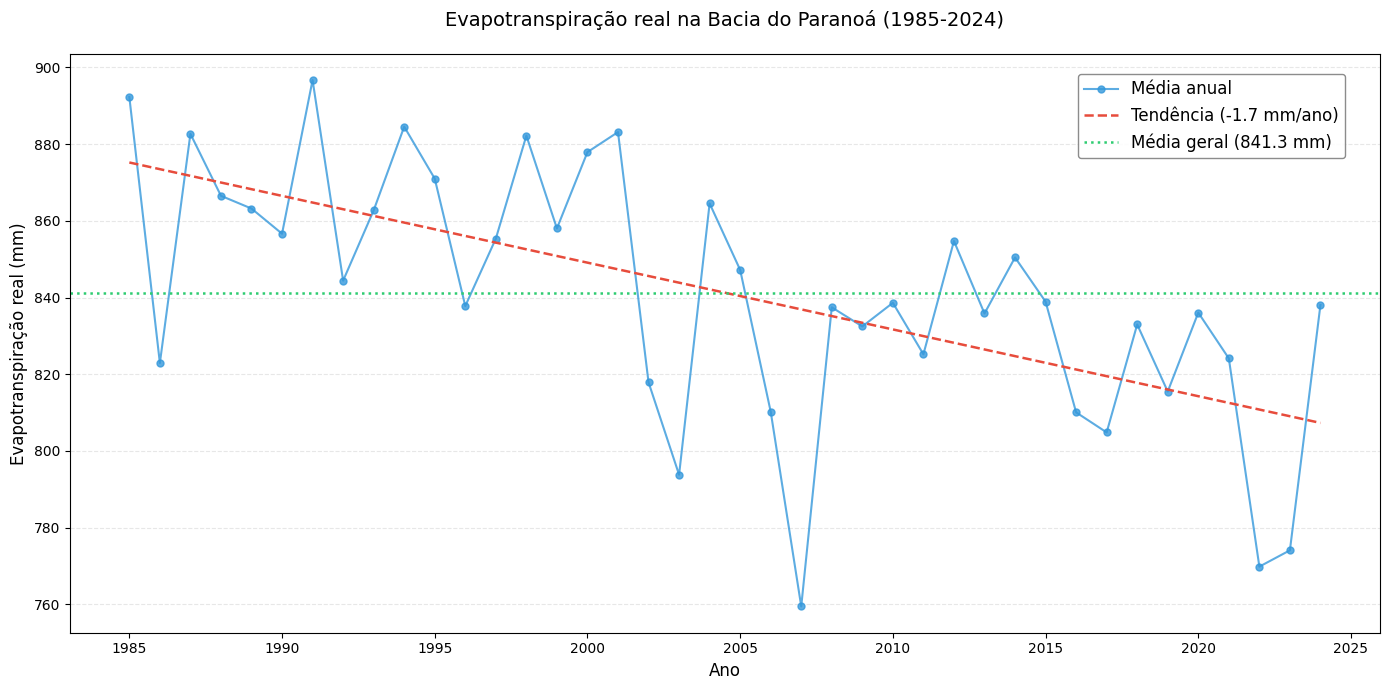

In [7]:
plot_medias_bh(resultados, variavel, suffix_name)

## POR UNIDADE HIDROGRÁFICA

In [6]:
resultados = calcular_medias_zonas_paranoa(gdf, anos, suffix_name, zona_column='uh_label')


=== Estatísticas Descritivas ===
| Zona              |   Média Geral (mm) |   CV (%) |   Variação Anual (±mm) | Anos Processados   |
|:------------------|-------------------:|---------:|-----------------------:|:-------------------|
| Córrego Bananal   |             991.71 |      3.3 |                  301.7 | 40/40              |
| Lago Paranoá      |             694.84 |      6   |                  437.1 | 40/40              |
| Riacho Fundo      |             666.5  |      9.9 |                  408.4 | 40/40              |
| Ribeirão do Gama  |             970.72 |      3.8 |                  303.2 | 40/40              |
| Ribeirão do Torto |            1030.97 |      2.8 |                  280.3 | 40/40              |

=== Análise de Tendências ===
| Zona              |   Tendência (mm/ano) |   p-valor |   R² |   Sen's Slope | Mann-Kendall         |
|:------------------|---------------------:|----------:|-----:|--------------:|:---------------------|
| Córrego Bananal   |        

In [8]:
resultados = calcular_medias_zonas_paranoa_temp(gdf, anos, suffix_name, zona_column='uh_label')
tendencias = analise_tendencia_por_zona(resultados)

In [9]:
#plot_tendencias_zonas_simples(tendencias, variavel, suffix_name)

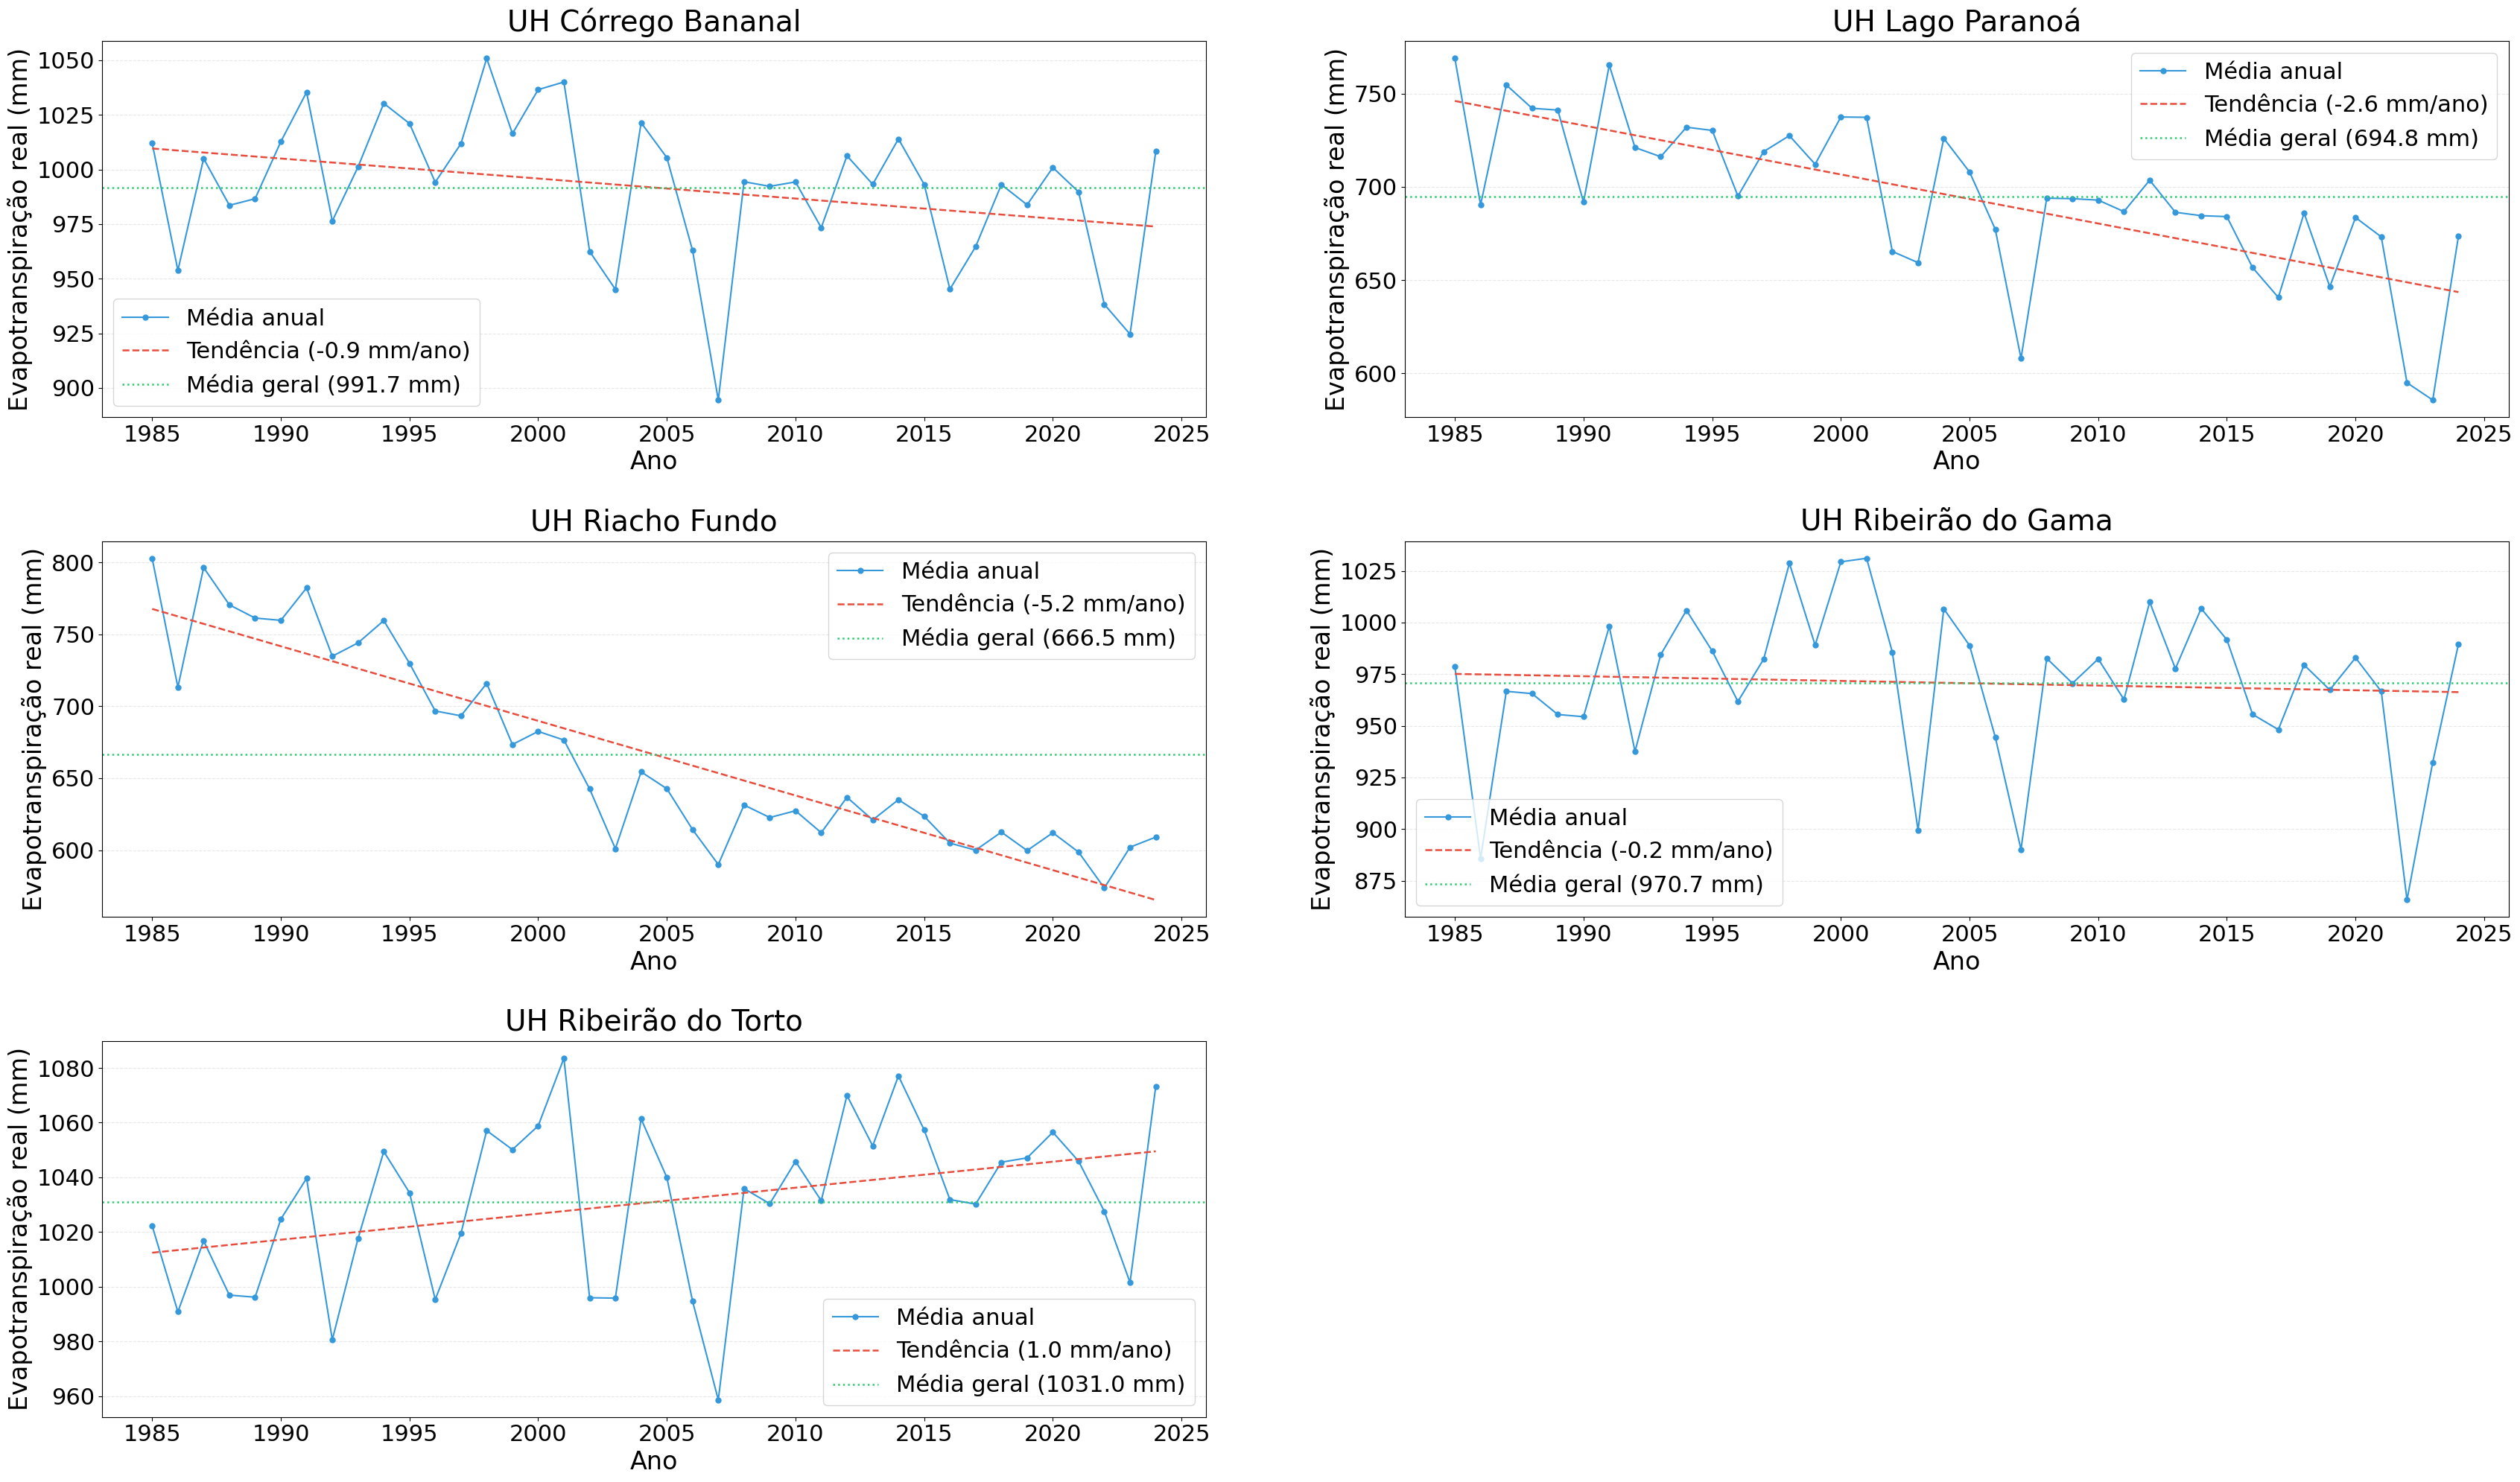

In [10]:
%reload_ext autoreload
plot_tendencias_zonas(tendencias, variavel, suffix_name)